In [2]:
import pandas as pd
import yfinance as yf

In [17]:
data = yf.download('AAPL', start='2013-10-01', end='2024-12-22')
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2013-10-01,15.115494,15.152047,14.818734,14.820903,353883600
2013-10-02,15.165059,15.234447,14.985084,15.043321,289184000
2013-10-03,14.974549,15.251483,14.891842,15.194485,322753200
2013-10-04,14.962780,15.011413,14.825552,14.988490,258868400
2013-10-07,15.108988,15.260774,15.034643,15.072126,312292400
...,...,...,...,...,...
2024-12-16,251.039993,251.380005,247.649994,247.990005,51694800
2024-12-17,253.479996,253.830002,249.779999,250.080002,51356400


In [18]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2826.000000,2826.000000,2826.000000,2826.000000,2.826000e+03
mean,85.588870,86.418506,84.667658,85.510018,1.338143e+08
std,65.893473,66.505228,65.189719,65.812623,8.851701e+07
min,14.898034,15.011413,14.815638,14.820903,2.404830e+07
25%,27.483165,27.662368,27.240630,27.406765,7.490370e+07
50%,49.890739,50.159607,49.302855,49.834427,1.081781e+08
75%,146.094120,147.116886,144.250130,145.857909,1.662927e+08
max,254.490005,255.000000,249.779999,252.160004,1.065523e+09


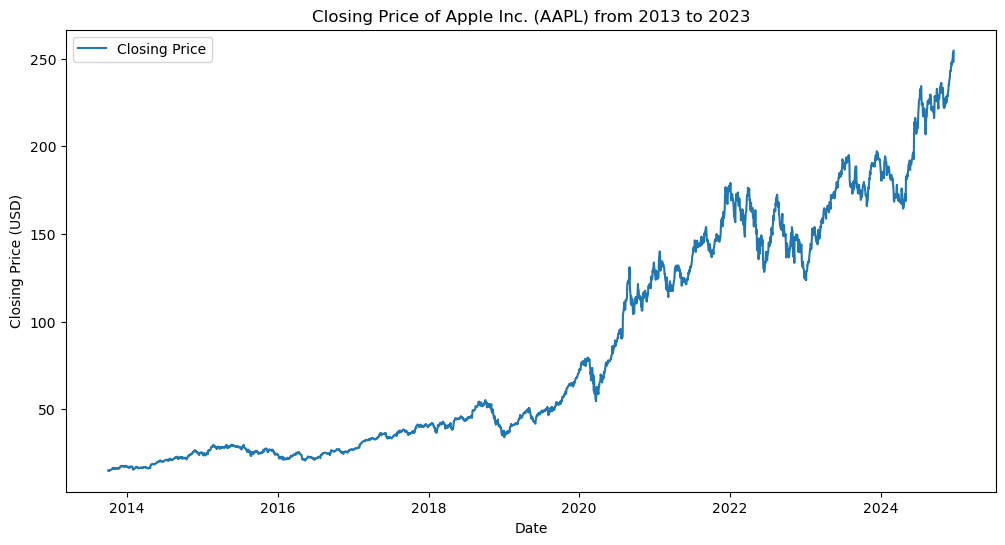

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting closing price
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title('Closing Price of Apple Inc. (AAPL) from 2013 to 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

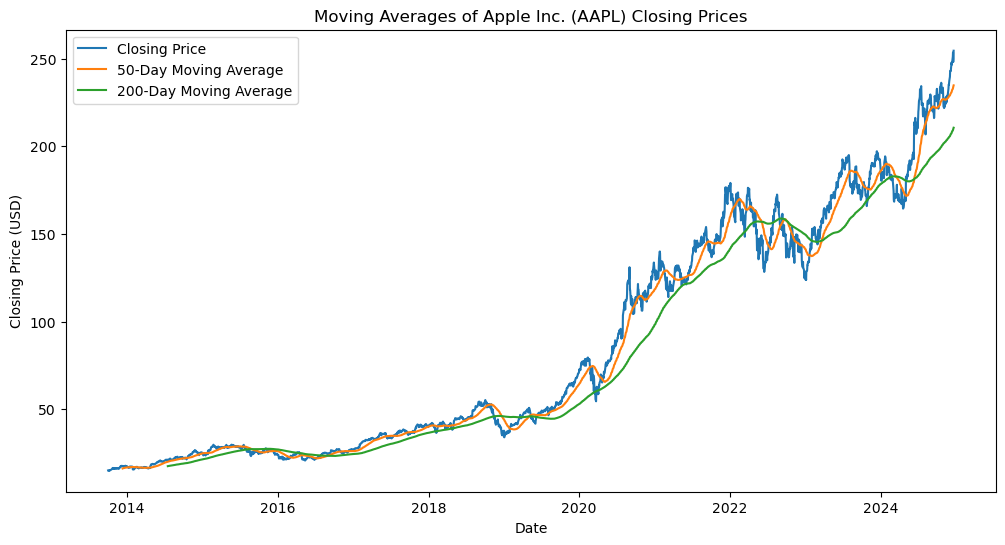

In [20]:
# Calculating moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plotting moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average')
plt.plot(data.index, data['MA200'], label='200-Day Moving Average')
plt.title('Moving Averages of Apple Inc. (AAPL) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [22]:
import mplfinance as mpf

# Plotting candlestick chart
mpf.plot(data[-100:], type='candle', title='Apple Inc. (AAPL) Candlestick Chart', style='yahoo')

ValueError: Data for column "Open" must be ALL float or int.

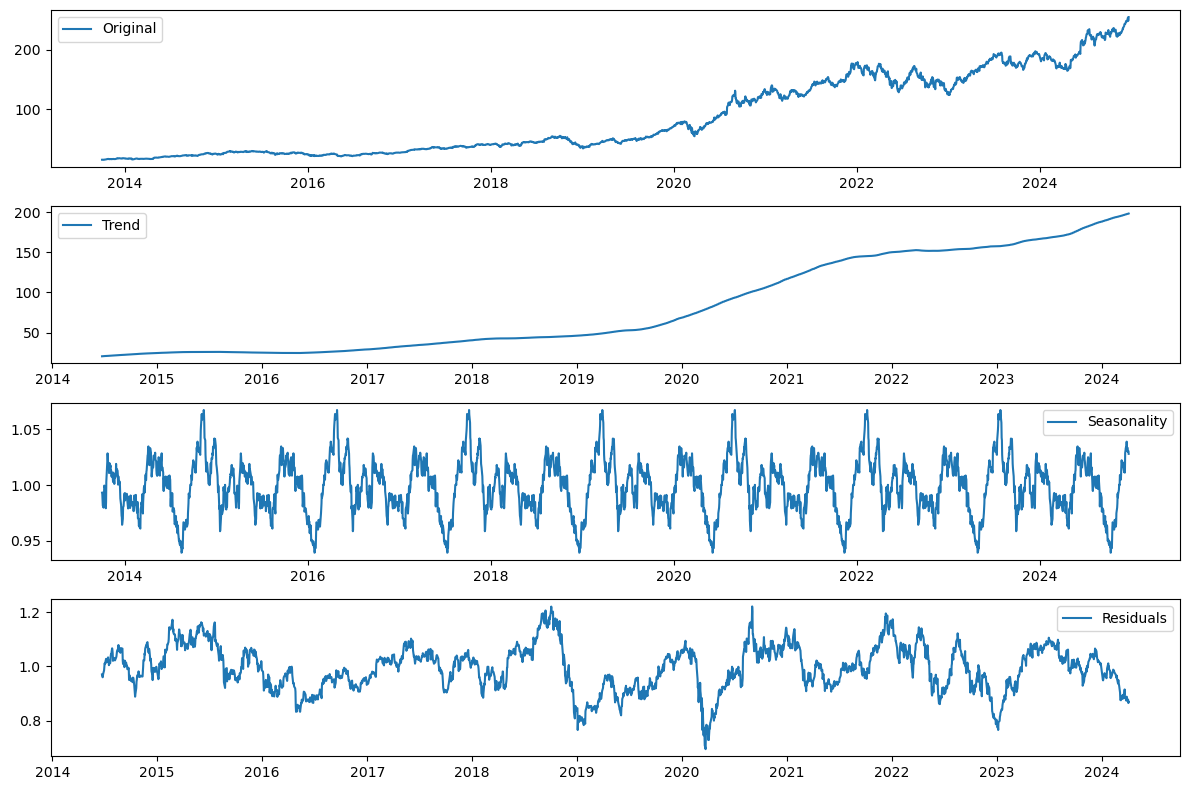

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


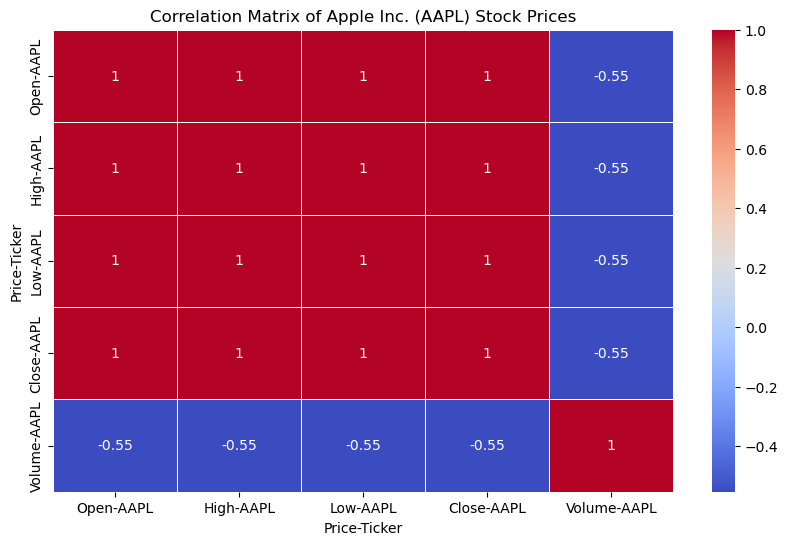

In [16]:
import seaborn as sns

# Correlation matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Apple Inc. (AAPL) Stock Prices')
plt.show()